<span style="font-size:150%">Проектная работа исследовательский анализ данных </span>
__________________________________________________________
<span style="font-size:150%"> Предобработка данных: </span>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss


In [3]:
# выявление символа-рзделителя
import csv


def find_delimiter(path):
    sniffer = csv.Sniffer()
    with open(path) as fp:
        delimiter = sniffer.sniff(fp.read(5000)).delimiter
    return delimiter

In [4]:
path = 'real_estate_data.csv'
df = pd.read_csv(path, sep = find_delimiter(path))

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Начнем работу с пропусками

In [7]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
print(f'Процентное количество пропущенных значений:  \n {round(100*df.isnull().sum()/len(df),2)}')

Процентное количество пропущенных значений:  
 total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64


Видим, что есть пропущенные значения в столбце days_exposition. Сам столбец показывает количество дней от размещения объявления до продажи квартиры. Пропуски в таком столбце могут означать, что квартиры еще не проданы, а значит строки с такими значениями нам не нужны, удалим их :
        

In [9]:
df.dropna(subset=['days_exposition'], inplace=True)

In [10]:
# рассмотрим столбец is_apartment
#  могут ли пропущенные значения соотвествовать "False"

df['is_apartment'].value_counts()

# никаких подтверждений этому нет, удалим столбец за неинформативностью

is_apartment
False    2462
True       38
Name: count, dtype: int64

In [11]:
df  = df.drop(columns = 'is_apartment')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20518 entries, 1 to 23697
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20518 non-null  int64  
 1   last_price            20518 non-null  float64
 2   total_area            20518 non-null  float64
 3   first_day_exposition  20518 non-null  object 
 4   rooms                 20518 non-null  int64  
 5   ceiling_height        12051 non-null  float64
 6   floors_total          20441 non-null  float64
 7   living_area           18813 non-null  float64
 8   floor                 20518 non-null  int64  
 9   studio                20518 non-null  bool   
 10  open_plan             20518 non-null  bool   
 11  kitchen_area          18443 non-null  float64
 12  balcony               11109 non-null  float64
 13  locality_name         20470 non-null  object 
 14  airports_nearest      15843 non-null  float64
 15  cityCenters_nearest   15

In [13]:
df['balcony'].value_counts()

balcony
0.0    3758
1.0    3657
2.0    3235
5.0     243
4.0     149
3.0      67
Name: count, dtype: int64

In [14]:
# предположим пропуски в "балконах" отражают их отсуствие

df.loc[df['balcony'].isna(), 'balcony'] = 0.0


In [15]:
df['balcony'].value_counts()

balcony
0.0    13167
1.0     3657
2.0     3235
5.0      243
4.0      149
3.0       67
Name: count, dtype: int64

In [16]:
# пропуски в столбцах airports_nearest,cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest
# могут означать, что рядом таких мест нет, заполнять пропуски нерационально

In [17]:
# ceiling_height 
# floors_total      
# living_area 
# kitchen_area
# заполним медианными для столбцов значениями

def median_value_to_null(df, col):
    df[col].median()
    df[col].fillna(df[col].median(), inplace=True)

cols = ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area']
for col in cols:
    median_value_to_null(df, col)


In [18]:
# first_day_exposition cодержит в себе формат даты/времени
# сообщим об этом pandas для удобства дальнейшей работы

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [19]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,10.6,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.5,4,False,...,6.0,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.5,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.0,12,False,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [20]:
# добавим столбец, отражающий цену за метр^2 
# округлим полученные значения до 2х знаков после запятой 

df['price_for_m'] = round(df['last_price']/df['living_area'],2)

In [21]:
# посмотрим на статистику такого столбца
# отрицательных и/или ярко выбивающихся значений нет 

df['price_for_m'].describe()

count    2.051800e+04
mean     1.884334e+05
std      2.095548e+05
min      3.809400e+02
25%      1.255814e+05
50%      1.661316e+05
75%      2.190813e+05
max      2.166333e+07
Name: price_for_m, dtype: float64

In [22]:
# создадим 3 столбца, отражающих:
# а) день недели
# б) месяц
# г) год
# выставления объявления о продаже

df['day_of_week'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year


In [23]:
# визуально оценим все ли в порядке с таблицей

pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,day_of_week,month,year
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.53,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.88,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2163333.33,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.00,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,200694.44,0,9,2018


In [24]:
# следующая задача - резделить этажи на первый/последний/другой

df['floor'].value_counts()

floor
2     2866
3     2650
1     2470
4     2386
5     2245
6     1143
7     1055
9      945
8      939
10     606
12     485
11     462
13     348
15     298
14     296
16     281
17     207
18     159
19     132
21     115
20     105
22      97
23      90
24      57
25      45
26      22
27      10
28       1
32       1
33       1
31       1
Name: count, dtype: int64

In [25]:
# floor 
# floors_total

df.loc[df['floor'] == 1, 'floor'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor'] = 'последний'
df.loc[(df['floor'] != 'первый') & (df['floor'] != 'последний'), 'floor'] = 'другой'


In [26]:
# создадим столбцы, отражающие такие характеристики как
# соотношение жилой и общей площади, а также отношение площади кухни к общей

df['living_to_total_area'] = round(df['living_area']/df['total_area'],2)
df['kitchen_to_total_area'] = round(df['kitchen_area']/df['total_area']  ,2)


In [27]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,day_of_week,month,year,living_to_total_area,kitchen_to_total_area
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,первый,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.53,1,12,2018,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,другой,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.88,3,8,2015,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,другой,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2163333.33,4,7,2015,0.19,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,другой,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.00,1,6,2018,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,другой,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,200694.44,0,9,2018,0.47,0.30


Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построем гистограммы для каждого параметра

In [28]:
# total_area 
# living_to_total_area	kitchen_to_total_area
# last_price
# rooms
# ceiling_height

In [29]:
# каждый столбец площадью содержит в себе очень много данных
# ускорим построение гистограмм, используя вектора np
# добавим все стобцы с площадями 

living_area_np = np.array(df['living_area'])
kitchen_area_np = np.array(df['kitchen_area'])
total_area_np = np.array(df['total_area'])


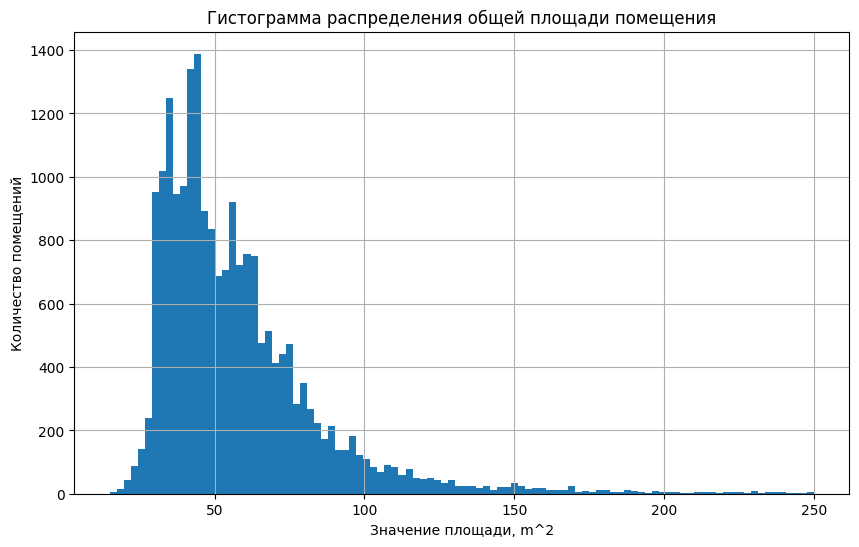

In [30]:
plt.figure(figsize=(10,6))
plt.hist(total_area_np, bins = 100, range=(15, 250),  histtype='bar')
plt.xlabel('Значение площади, m^2')
plt.ylabel('Количество помещений')
plt.title('Гистограмма распределения общей площади помещения')
plt.grid(True)
plt.show()


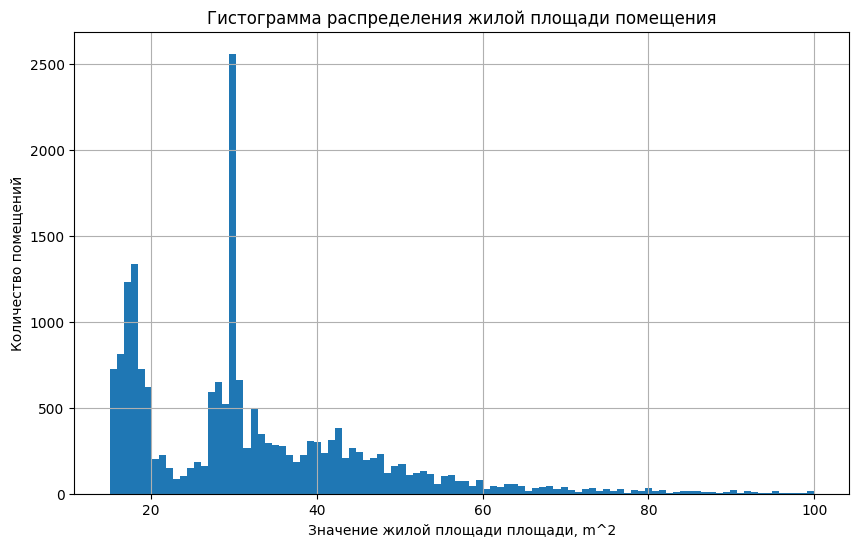

In [31]:
plt.figure(figsize=(10,6))
plt.hist( living_area_np, bins = 100, range=(15, 100),  histtype='bar')
plt.xlabel('Значение жилой площади площади, m^2')
plt.ylabel('Количество помещений')
plt.title('Гистограмма распределения жилой площади помещения')
plt.grid(True)
plt.show()

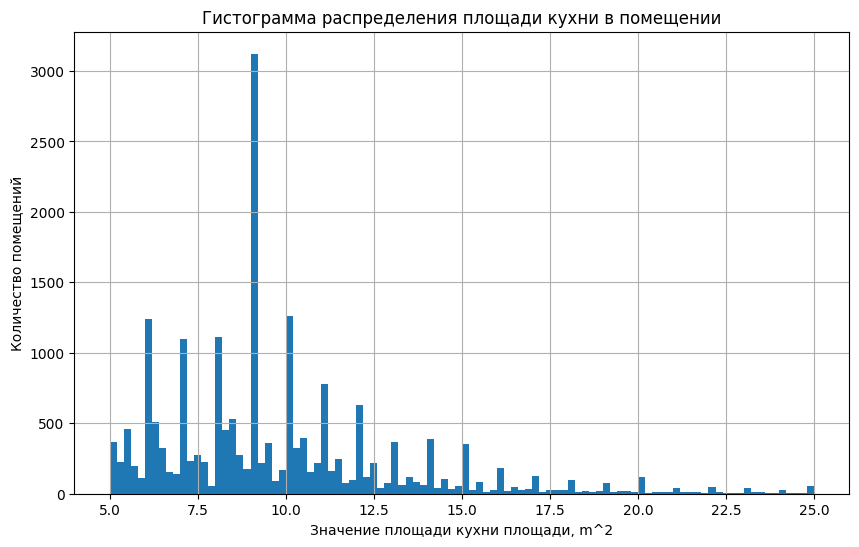

In [32]:
plt.figure(figsize=(10,6))
plt.hist(kitchen_area_np, bins = 100, range=(5, 25),  histtype='bar')
plt.xlabel('Значение площади кухни площади, m^2')
plt.ylabel('Количество помещений')
plt.title('Гистограмма распределения площади кухни в помещении')
plt.grid(True)
plt.show()

По гистограммам, построенным выше можем сделать следующие выводы: 
1. Общая площадь (закономерно) превосходит кухонную и жилую, являсь стобцом с самыми высокими значениями. Хотя основная часть из них лежит в интервале от 15 до 250 м2. Удивительно, но встречаются и помещения с площадью, превышающей 400 м2.
2. Основные значения жилой площади расположены в интервале 15 - 100 м2. Также встречаются помещения с более высокими зачениями, но куда реже. Максимальное количество помещений имеют площадь примерно равную 35 м2.
3. Гистограмма распределения кухнной площади выглядит сильно ступенчато: максимум приходится на 8 м2. Основные значения лежат в интервале от 5 м2 до 25м2. 

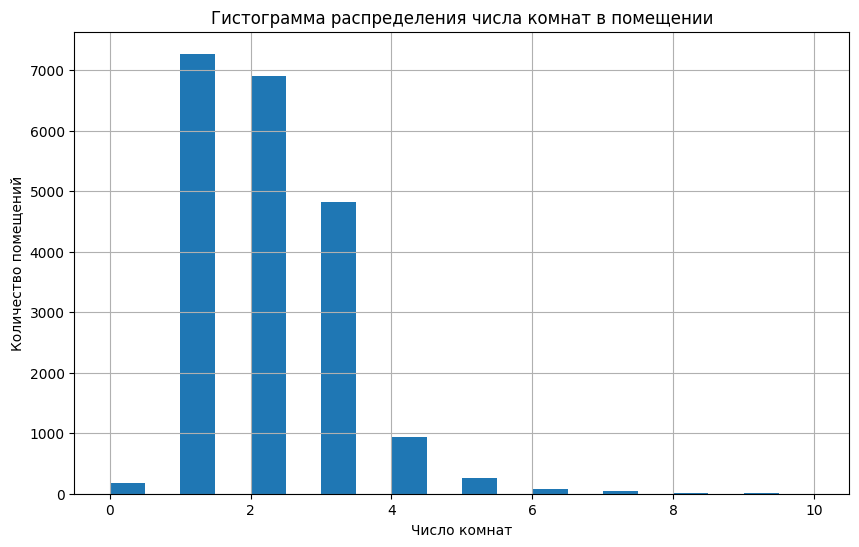

In [33]:
# построим гистограмму по числу комнат 

plt.figure(figsize=(10,6))
plt.hist(np.array(df['rooms']), bins = 50,range=(0, 10),  histtype='bar', width=0.5)
plt.xlabel('Число комнат')
plt.ylabel('Количество помещений')
plt.title('Гистограмма распределения числа комнат в помещении')
plt.grid(True)
plt.show()

Видим, что основная часть помещений имеет 1-4 комнаты, хотя встречаются помещения, в которых их и более 10

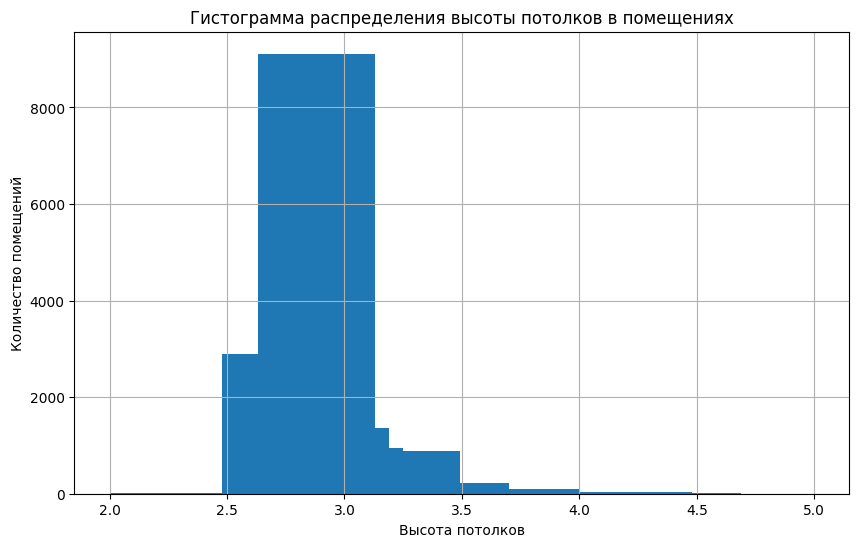

In [34]:
# оставшаяся диаграмма - высота потолков 

plt.figure(figsize=(10,6))
plt.hist(np.array(df['ceiling_height']),bins = 100,  range=(2, 5),  histtype='bar', width=0.5)
plt.xlabel('Высота потолков')
plt.ylabel('Количество помещений')
plt.title('Гистограмма распределения высоты потолков в помещениях')
plt.grid(True)
plt.show()

Основное количество помещений имеет высоту потолков 2-5 метров, хотя встречаются и более высокие (до  100 метров), что редкость 

In [35]:
#  Изучим время продажи квартир 

df['days_exposition'].info()

<class 'pandas.core.series.Series'>
Index: 20518 entries, 1 to 23697
Series name: days_exposition
Non-Null Count  Dtype  
--------------  -----  
20518 non-null  float64
dtypes: float64(1)
memory usage: 320.6 KB


In [36]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

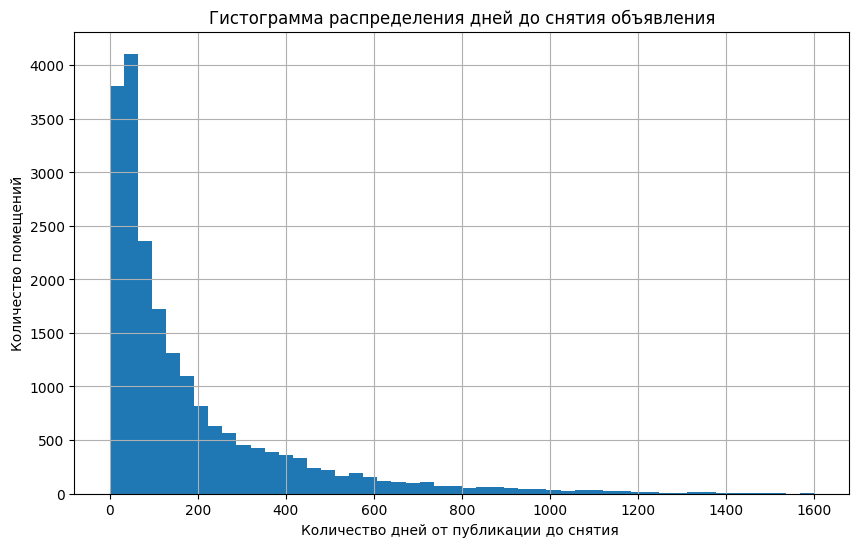

In [37]:

plt.figure(figsize=(10,6))
plt.hist(np.array(df['days_exposition']), range = (0, 1600), bins = 50)
plt.xlabel('Количество дней от публикации до снятия ')
plt.ylabel('Количество помещений')
plt.title('Гистограмма распределения дней до снятия объявления')
plt.grid(True)
plt.show()

Видим пример распределения Пирсона. Много квартир, продающихся довольно "быстро" и уменьшаещееся количетво для квартир, чьи объявления "висели" долго

In [38]:
mean = np.mean(df['days_exposition'])
median = df['days_exposition'].median(skipna=True)

print('Среднее значение:', mean)
print('Медиана:', median)

Среднее значение: 180.88863436982163
Медиана: 95.0


Выбросы в распределении Пирсона можно найти с помощью стандартного метода определения выбросов - правила трех сигм. Если значение находится за пределами интервала (μ - 3σ, μ + 3σ), где μ - среднее значение, а σ - стандартное отклонение, то это значение может быть выбросом.

In [39]:
std_dev = np.std((df['days_exposition']))

max_normal = mean + 3*std_dev

print("Стандартное отклонение:", round(std_dev,3))

print("Верхняя граница количества дней продажи квартир, после которой необычные данные (выбросы) :", round(max_normal))


Стандартное отклонение: 219.723
Верхняя граница количества дней продажи квартир, после которой необычные данные (выбросы) : 840


In [40]:
# Попробуем убрать редкие и выбивающиеся значения 
# Попробуем использовать метод замены на медиану
 
df.loc[df['days_exposition'] > max_normal , 'days_exposition'] =  np.median((df['days_exposition']))

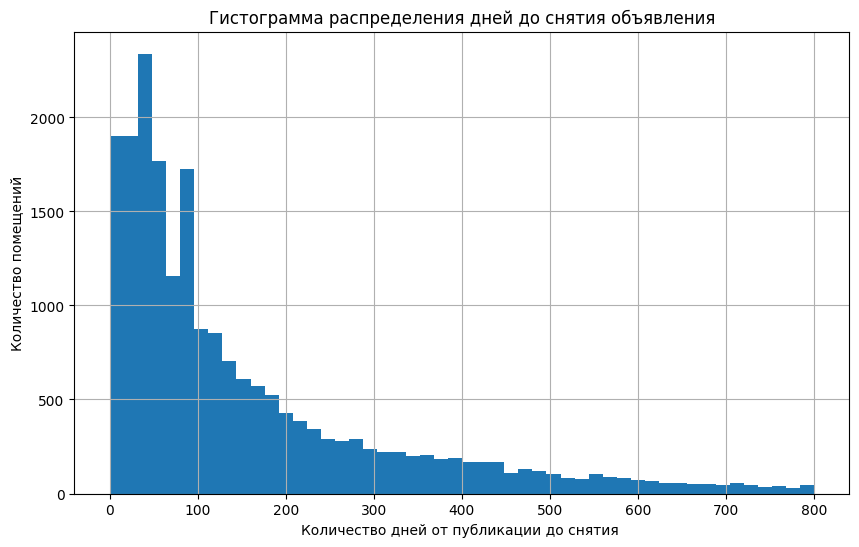

In [41]:
# Вновь построим гистограмму 

plt.figure(figsize=(10,6))
plt.hist(np.array(df['days_exposition']), range = (0, 800), bins = 50)
plt.xlabel('Количество дней от публикации до снятия ')
plt.ylabel('Количество помещений')
plt.title('Гистограмма распределения дней до снятия объявления')
plt.grid(True)
plt.show()

In [42]:
df['days_exposition'].value_counts()

days_exposition
45.0     880
95.0     587
60.0     538
7.0      234
30.0     208
        ... 
774.0      1
723.0      1
696.0      1
526.0      1
784.0      1
Name: count, Length: 817, dtype: int64

Будем считать, что необычно быстрая продажа квартир - до 95 дней, а необычно высокая - свыше 840. Т.е. норма продажи квартиры от 3 месяцев до 3х лет.

Нижнюю границу определили по медианному значению, которое не так далеко от среднего. 
_____________________________________________________________________________________________________________________

Выясним, какие факторы влияют на цену квартир 

- Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 
- Изучиим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
- Также изучим зависимость от даты размещения: дня недели, месяца и года.

<Axes: >

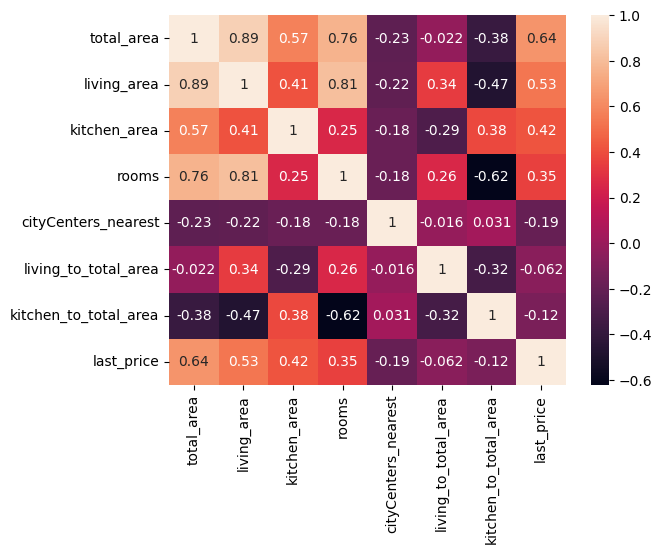

In [43]:
# total_area
# living_area
# kithen_area
# rooms
# cityCenters_nearest


corr_list = ['total_area','living_area','kitchen_area','rooms','cityCenters_nearest','living_to_total_area','kitchen_to_total_area','last_price']
corr_matrix = df[corr_list].corr()
sns.heatmap(corr_matrix, annot=True)


Видим, что самая большая корреляция с ценой наблюдается для общей и жилой площади. Количество комнат и площадь кухни, а также соотношения площадей друг к другу уже не так влияет на цену 

Теперь нужно установить если ли взаимосвязь цены с этажностью. Корреляция между категориальным признаком и столбцом с непрерывными числами может быть рассчитана с помощью коэффициента корреляции Крамера (Cramer’s V)1. Этот коэффициент является мерой силы связи между двумя категориальными переменными и может быть рассчитан для таблиц сопряженности любого размера.

Коэффициент корреляции Крамера принимает значения от 0 до 1. Значения ближе к 0 указывают на отсутствие связи между категориальным признаком и столбцом с непрерывными числами, а значения ближе к 1 указывают на сильную связь между ними. 

Обычно, значения коэффициента корреляции Крамера менее 0.1 указывают на слабую связь, значения от 0.1 до 0.3 - на умеренную связь, а значения более 0.3 - на сильную связь.

In [44]:

# Создаем таблицу сопряженности
table = pd.crosstab(df['floor'], df['last_price'])

# Рассчитываем коэффициент корреляции Крамера
cramer_v = ss.chi2_contingency(table)[0] / (table.sum().sum() * (min(table.shape)-1)) 
cramer_v

0.13389662630553728

In [45]:
pd.set_option('display.max_columns', None)
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,day_of_week,month,year,living_to_total_area,kitchen_to_total_area
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,первый,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.53,1,12,2018,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,другой,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.88,3,8,2015,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,другой,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2163333.33,4,7,2015,0.19,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,другой,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.00,1,6,2018,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,другой,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,200694.44,0,9,2018,0.47,0.30


Видим значение 0.13, что говорит об умеренной связи. Т.е. несмотря на наличие влияние этажности на цену, оно не сильно значительное.

In [46]:
df[['day_of_week','month', 'year','last_price']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20518 entries, 1 to 23697
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day_of_week  20518 non-null  int32  
 1   month        20518 non-null  int32  
 2   year         20518 non-null  int32  
 3   last_price   20518 non-null  float64
dtypes: float64(1), int32(3)
memory usage: 561.0 KB


<Axes: >

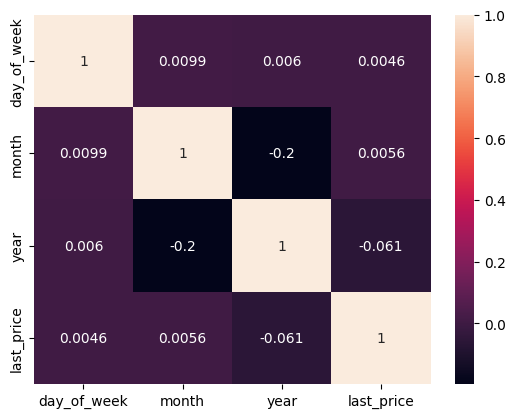

In [47]:
# day_of_week
# month
# year

corr_list = ['day_of_week','month','year','last_price']
corr_matrix = df[corr_list].corr()
sns.heatmap(corr_matrix, annot=True)

Видим, что никакой корреляции между днем недели, месяцем и годом выкладывания объявления и ценой не прослеживается. Это скорее всего связано с двумя факторами: 
1. цены на квартиру весьма высоки и не подвержены сильным измененниям с течением небольшого времени (без учета экономических спадов и т.п.)
2. на снятие объявляения в среднем уходит до 2.5 лет, а значит не сколько важно, когда выложено объявление, сколько важно когда его просмотрели, но такими данными мы не обладаем 
___________________________________________________________________________________

Теперь выберем 10 населённых пунктов с наибольшим числом объявлений. 
- Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
- Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

(Эти данные можно найти по имени в столбце locality_name)

In [48]:
# Выведем 10 самых популярных городов 

df['locality_name'].value_counts().head(10)


locality_name
Санкт-Петербург      13638
посёлок Мурино         517
посёлок Шушары         408
Всеволожск             339
Колпино                308
Пушкин                 307
посёлок Парголово      302
деревня Кудрово        299
Гатчина                268
Выборг                 208
Name: count, dtype: int64

In [49]:
# выберем 10 населённых пунктов с наибольшим числом объявлений
top10 = df['locality_name'].value_counts().head(10).index.tolist()

# посчитаем среднюю цену квадратного метра в этих населённых пунктах
mean_price = df[df['locality_name'].isin(top10)].groupby('locality_name')['price_for_m'].mean()

# выделим населённые пункты с самой высокой и низкой стоимостью жилья
highest_price = mean_price.idxmax()
lowest_price = mean_price.idxmin()

print(f'Средняя цена квадратного метра в топ-10 населённых пунктах: \n{mean_price}\n')
print(f'Населённый пункт с самой высокой стоимостью жилья: {highest_price}')
print(f'Населённый пункт с самой низкой стоимостью жилья: {lowest_price}')


Средняя цена квадратного метра в топ-10 населённых пунктах: 
locality_name
Всеволожск           133033.866873
Выборг                97055.239952
Гатчина              119563.316940
Колпино              131264.550487
Пушкин               190134.103225
Санкт-Петербург      217439.600359
деревня Кудрово      183394.420535
посёлок Мурино       170511.948743
посёлок Парголово    197309.740033
посёлок Шушары       154927.601176
Name: price_for_m, dtype: float64

Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург
Населённый пункт с самой низкой стоимостью жилья: Выборг


______________
Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
- Выделим квартиры в Санкт-Петербурге (locality_name). 
- Наша задача — выяснить, какая область входит в центр. 
- Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. 
- После этого посчитаем среднюю цену для каждого километра.
- Построем график: он должен показывать, как цена зависит от удалённости от центра. 
- Определим границу, где график сильно меняется, — это и будет центральная зона.

In [50]:
# создадим отдельный датасет с данными лишь о квартирах в Питербурге

StP = df.loc[df['locality_name'] == 'Санкт-Петербург']
StP.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,day_of_week,month,year,living_to_total_area,kitchen_to_total_area
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,другой,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.88,3,8,2015,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,другой,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2163333.33,4,7,2015,0.19,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,другой,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.00,1,6,2018,0.32,0.41
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,другой,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,123853.21,6,2,2017,0.71,0.11
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,другой,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,248768.47,3,11,2017,0.51,0.21


In [54]:
StP = pd.pivot_table(df.loc[df['locality_name'] == 'Санкт-Петербург'], values= 'last_price', index=None, columns='cityCenters_nearest', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
StP.T

,last_price
cityCenters_nearest,
208.0,5800000.0
215.0,10990000.0
287.0,9590000.0
318.0,44700657.0
329.0,7200000.0
...,...
28109.0,7600000.0
28644.0,4775000.0
28806.0,4370000.0


In [61]:

StP = df[df['locality_name'] == 'Санкт-Петербург']
StP['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
StP['cityCenters_nearest_km'] = StP['cityCenters_nearest_km'].round()
table = pd.pivot_table(StP, values='last_price', index='cityCenters_nearest_km', aggfunc='mean')
table.head()

C:\Users\orlov\AppData\Local\Temp\ipykernel_3320\4234568373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StP['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
C:\Users\orlov\AppData\Local\Temp\ipykernel_3320\4234568373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StP['cityCenters_nearest_km'] = StP['cityCenters_nearest_km'].round()


,last_price
cityCenters_nearest_km,
0.0,3.037803e+07
1.0,1.900463e+07
2.0,1.761016e+07
3.0,1.038840e+07
4.0,1.322568e+07


In [63]:
StP.plot()
plt.show()

ValueError: Date ordinal -38150000.0 converts to -102482-11-07T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>